In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import random 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nation_corp = {
    'Austria': ['LGEAG'],    'Czech Republic': ['LGECZ'],    'France': ['LGEFS'],    'Germany': ['LGEDG'],    'Greece': ['LGEHS'],    'Hungary': ['LGEMK'],    'Italy': ['LGEIS'],    'Netherlands': ['LGESC', 'LGEEH', 'LGEBN'],    'Poland': ['LGEWR', 'LGEPL', 'LGEMA'],    'Portugal': ['LGEPT','LGEBT'],
    'EUs': ['LGEEB'],    'Romania': ['LGERO'],    'Spain': ['LGEES'],    'Sweden': ['LGENO', 'LGESW'],    'United Kingdom': ['LGEUK'],      'Kazakhstan': ['LGEAK'],    'Russia': ['LGERM', 'LGERI', 'LGERA'],
    'Ukraine': ['LGEUR'],    'Latvia': ['LGELV','LGELA'],    'Algeria': ['LGEAS'],
    'Egypt': ['LGEEG'],    'Jordan': ['LGELF'],    'Kenya': ['LGESK','LGEEF'],    'Morocco': ['LGEMC'],
    'Saudi Arabia': ['LGESJ'],    'Iran':['LGEIR'],     'Israel':['LGEYK'],     'The Republic of South Africa': ['LGESA'],
    'Tunisia': ['LGETU'],    'U.A.E': ['LGEOT', 'LGEDF', 'LGEGF', 'LGEME', 'LGEAF'],    'Nigeria': ['LGEAO', 'LGENI'],
    'Turkey': ['LGETK', 'LGEAT'],    'Australia': ['LGEAP'],
    'China': ['LGEQA', 'LGETL', 'LGECH', 'LGEYT', 'LGETR', 'LGETA', 'LGESY', 'LGESH', 'LGEQH', 'LGEQD', 'LGEPN', 'LGEND', 'LGEKS', 'LGEHZ', 'LGEHN', 'LGEHK'],
    'India': ['LGEIL'],    'Indonesia': ['LGEIN'],    'Japan': ['LGEJP'],    'Malaysia': ['LGEML'],    'Philippines': ['LGEPH'],
    'Singapore': ['LGESL'],    'Taiwan': ['LGETT'],    'Korea' :['LGEKR'],    'Thailand': ['LGETH'],    'Vietnam': ['LGEVN','LGEVH'],
     'Canada': ['LGECI'],    'Mexico': ['LGERS', 'LGEMX', 'LGEMS', 'LGEMM'],    'United States': ['LGEMR', 'LGEUS', 'LGEMU', 'LGEAI'],
    'Argentina': ['LGEAG','LGEAR'],    'Brazil': ['LGEBR','LGESP'],    'Chile': ['LGECL'],    'Colombia': ['LGEVZ', 'LGECB'],
    'Panama': ['Guatemala', 'LGEPS'],    'Peru': ['LGEPR']}
continent_nation={
    'Europe':['EUs','Austria', 'Czech Republic' ,'France' ,'Germany', 'Greece' ,'Hungary', 'Italy', 'Netherlands' ,'Poland' ,'Portugal' ,'Romania', 'Spain' ,'Sweden','United Kingdom'], 
    'Russia and CIS':['Kazakhstan','Russia', 'Ukraine', 'Latvia'],     'Africa and MiddleEast': ['Israel','Iran','Algeria', 'Egypt', 'Jordan', 'Kenya', 'Morocco','Saudi Arabia','The Republic of South Africa','Tunisia', 'U.A.E', 'Nigeria', 'Turkey'], 
    'Asia':['Korea','Australia','China','India','Indonesia','Japan','Malaysia','Philippines','Singapore','Taiwan','Thailand','Vietnam'], 
    'NorthAmerica' : ['Canada','Mexico','United States'],    'SouthAmerica' :['Argentina','Brazil','Chile','Colombia','Panama','Peru']
    
}
hemisphere = {
    'Northern': ['EUs', 'Austria', 'Czech Republic', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Kazakhstan', 'Russia', 'Ukraine', 'Latvia', 'Israel', 'Iran', 'Jordan', 'Morocco', 'Saudi Arabia', 'Tunisia', 'Turkey', 'Korea', 'China', 'Japan', 'Taiwan', 'Canada', 'United States', 'Mexico', 'Panama'],
    'Southern': ['Algeria', 'Egypt', 'Kenya', 'The Republic of South Africa', 'U.A.E', 'Nigeria', 'Australia', 'India', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru']
}
mapping_dict = {

    "others": "Other",
    "Others": "Other",
    "other_": "Other",
    "other": "Other",
    "Etc.": "ETC.",
}

In [43]:
def same_word_detect(df, categorical_list):
    for feature in categorical_list:
        df[feature] = df[feature].str.lower()
        # 특수문자를 대체 문자열 지정
        replacement = {'/': '', 
                       '-':'', 
                       '_':'',
                       ' ':'', 
                       '~':'',
                       '&':'',
                       '.':'',
                       ',':''}
        # replace() 함수를 사용하여 특수 문자 대체
        df[feature] = df[feature].replace(replacement)
    return df

In [124]:
train = pd.read_csv('/home/workspace/LGamiers/train.csv')
test = pd.read_csv('/home/workspace/LGamiers/submission.csv')

In [125]:
def same_word_detect(df, categorical_list):
    for feature in categorical_list:
        df[feature] = df[feature].str.lower()
        # replace() 함수를 사용하여 특수 문자 대체
        df[feature] = df[feature].str.replace(pat=r'[^\w\s]', repl=r' ', regex=True)
        df[feature] = df[feature].str.replace(pat=r'_', repl=r' ', regex=True)
        
    return df

In [127]:
train

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.040000,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.040000,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.040000,40327,NaN,Enterprise,NaN,NaN,NaN,...,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False


In [126]:
# Category data True 비율 확인하는 함수

def ploting_cat_fet(df, cols, vis_row=5, vis_col=2):
    
    grid = GridSpec(vis_row,vis_col) # The grid of chart
    plt.figure(figsize=(17, 35)) # size of figure

    # loop to get column and the count of plots
    for n, col in enumerate(df[cols]): 
        tmp = pd.crosstab(df[col], df['is_converted'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=df, order=list(tmp[col].values) , color='green') 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label

        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=16)
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/len(df)*100),
                    ha="center", fontsize=14) 
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


    plt.subplots_adjust(hspace = 0.5, wspace=.3)
    plt.show()

In [114]:
temp = same_word_detect(train, ['expected_timeline'])

In [68]:
temp = same_word_detect(train, ['inquiry_type'])
for i in range(22):
    print(temp['inquiry_type'].value_counts().index[i])


quotation or purchase consultation
sales inquiry
product information
usage or technical consultation
other
trainings
technical consultation
services
request for partnership
request for quotation or purchase
etc 
request a demo
others
technical support
other 
sales
request for distributorship
request for technical consulting
customer suggestions
purchase or quotation
idb
technical


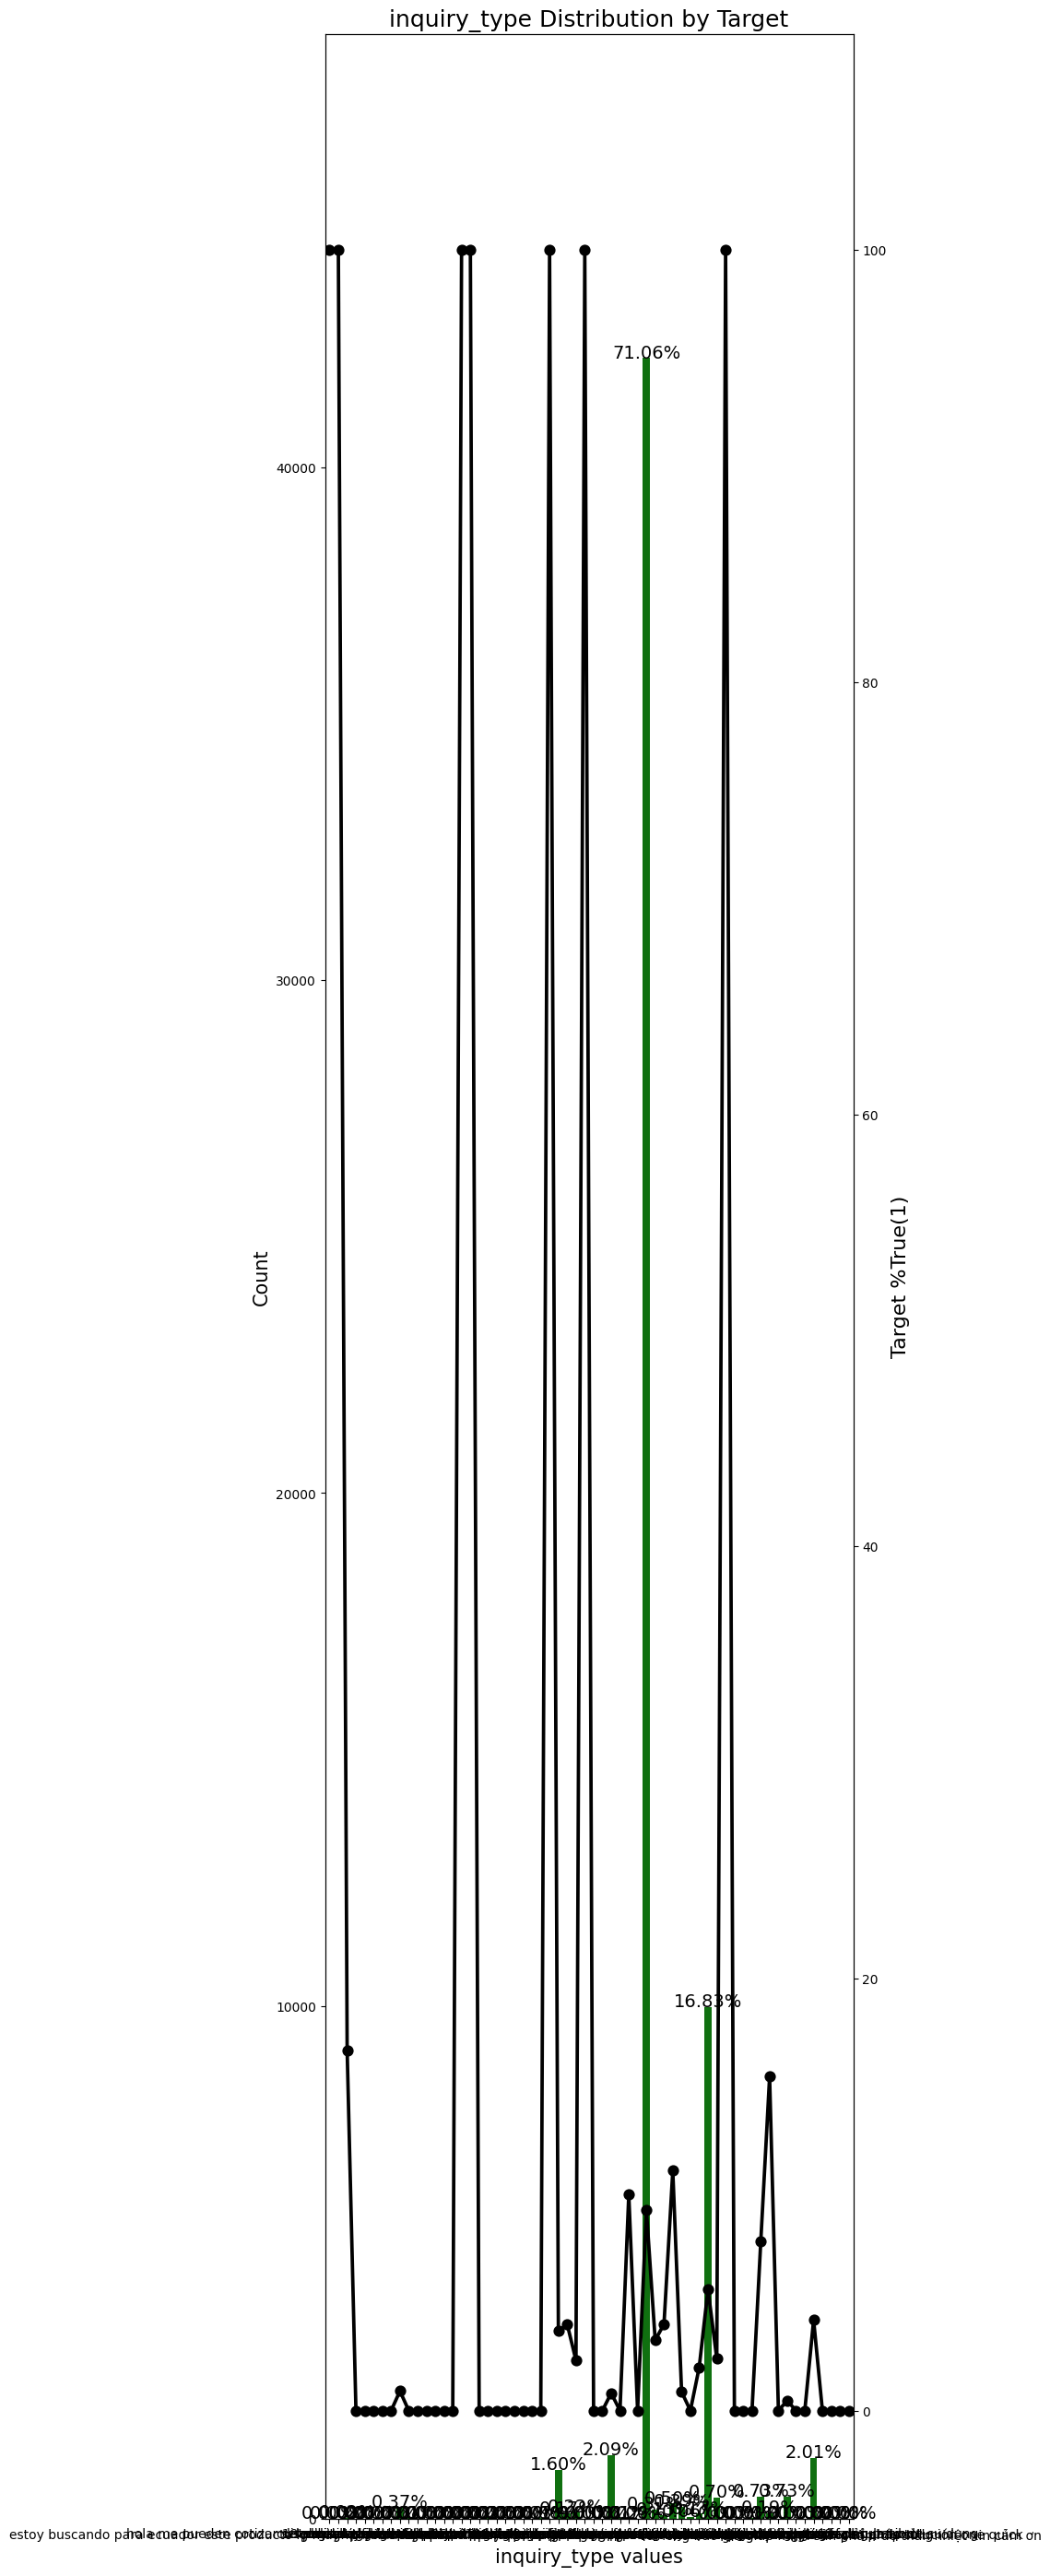

In [67]:
temp = same_word_detect(train, ['inquiry_type','business_unit'])
ploting_cat_fet(train,['inquiry_type'],1)

In [120]:
def make_in_purchase(df):
    df.reset_index(drop=True, inplace=True)
    token_list = df['inquiry_type'].str.split()
    df['in_purchase'] = 0
    for i in range(len(df)):
        # nan 처리
        if type(token_list[i]) == float:
            continue
        if 'purchase' in token_list[i]:
            df['in_purchase'][i] = 1 
    return df

In [ ]:
def change_purchase(train, test):
    df = pd.concat([train, test])
    idx = len(train)
    df.reset_index(drop=True, inplace=True)
    token_list = df['inquiry_type'].str.split()
    for i in range(len(df)):
        # nan 처리
        if type(token_list[i]) == float:
            continue
        if 'purchase' in token_list[i]:
            df['inquiry_type'][i] = 'purchase' 
    return df[:idx], df[idx:] 

In [121]:
temp = make_in_purchase(temp)

In [123]:
temp[temp['in_purchase'] == 1]['is_converted'].value_counts()

is_converted
False    38465
True      3919
Name: count, dtype: int64

In [77]:
token_list = temp['inquiry_type'].str.split()

In [95]:
type(token_list[440]) == list

True

In [74]:
train['inquiry_type'].str.split()

0        [quotation, or, purchase, consultation]
1        [quotation, or, purchase, consultation]
2                         [product, information]
3        [quotation, or, purchase, consultation]
4        [quotation, or, purchase, consultation]
                          ...                   
59294                     [product, information]
59295                                        NaN
59296                                        NaN
59297    [quotation, or, purchase, consultation]
59298    [request, for, quotation, or, purchase]
Name: inquiry_type, Length: 59299, dtype: object

In [ ]:
ploting_cat_fet(temp,1)

In [ ]:
cols = ['bant_submit','business_unit','customer_type','enterprise', 'customer_job', 'inquiry_type','business_area']